In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Data/Speed Dating Data.csv", encoding="ISO-8859-1")

In [3]:
# Let's have a look at our dataset
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# What are our variables
df.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

In [5]:
# How many inputs de we have
df.shape

(8378, 195)

In [6]:
# How many null values do we have
na_calc = df.isnull().sum() / len(df)

In [7]:
na_calc

iid         0.000000
id          0.000119
gender      0.000000
idg         0.000000
condtn      0.000000
wave        0.000000
round       0.000000
position    0.000000
positin1    0.220339
order       0.000000
partner     0.000000
pid         0.001194
match       0.000000
int_corr    0.018859
samerace    0.000000
age_o       0.012413
race_o      0.008713
pf_o_att    0.010623
pf_o_sin    0.010623
pf_o_int    0.010623
pf_o_fun    0.011697
pf_o_amb    0.012772
pf_o_sha    0.015397
dec_o       0.000000
attr_o      0.025304
sinc_o      0.034256
intel_o     0.036524
fun_o       0.042970
amb_o       0.086178
shar_o      0.128432
              ...   
amb1_3      0.525662
shar1_3     0.525662
attr7_3     0.759370
sinc7_3     0.759370
intel7_3    0.759370
fun7_3      0.759370
amb7_3      0.759370
shar7_3     0.759370
attr4_3     0.646813
sinc4_3     0.646813
intel4_3    0.646813
fun4_3      0.646813
amb4_3      0.646813
shar4_3     0.646813
attr2_3     0.646813
sinc2_3     0.646813
intel2_3    0

In [55]:
# Let's get rid of all the variables that have more than 50% of null values
filtered_na_calc = na_calc[na_calc < 0.05].index

In [56]:
clean_df = df.loc[:,filtered_na_calc]

In [ ]:
clean_df.income = clean_df.income.fillna('0')

In [57]:
# Finally we drop the inputs where we have null values, just so we can proceed quickly with a first version of our dataset
dating = clean_df.dropna()

In [58]:
# If we look at our dataset, we will find an income variable. This variable seems important, however...
# ... if we look at it we realize that it's defined as a string, which is not exactly relevant for the rest of our analysis
# So we decide to put it in a integer format for the sake of better results
dating.income = dating.income.apply(lambda x: int(float(x.replace(',', ''))))

AttributeError: 'DataFrame' object has no attribute 'income'

In [59]:
# We retrieve then all the columns that aren't numeral variables
non_num_cols = []
for col in dating.columns:
    if dating[col].dtypes == 'object':
        non_num_cols.append(col)
non_num_cols

['field', 'from', 'career']

In [60]:
# And create a duplicate dataset with only numbers. This helps us:
# - to loop over the dataset variables while checking their correlation with the match outcome
# - perform some computations later (probably)
dating_with_only_numbers = dating.drop(non_num_cols, axis=1)
col_corr_with_match = [(col, abs(dating_with_only_numbers["match"].corr(dating_with_only_numbers[col]))) for col in dating_with_only_numbers.columns]

In [61]:
# Let's check what variables influence the most the match outcome
def sortSecond(val):
    return val[1]
col_corr_with_match.sort(key = sortSecond, reverse = True)
col_corr_with_match

[('match', 1.0),
 ('dec_o', 0.5255941037769424),
 ('dec', 0.5240191818225663),
 ('like', 0.31512458310897745),
 ('like_o', 0.31298893703734854),
 ('fun', 0.27965888044674025),
 ('fun_o', 0.27903014192583336),
 ('prob', 0.2650003659714921),
 ('attr', 0.2649244473766586),
 ('attr_o', 0.2636923433474261),
 ('prob_o', 0.2605513696592771),
 ('sinc', 0.1707656033773464),
 ('intel', 0.17053614609995885),
 ('intel_o', 0.16902990726825862),
 ('sinc_o', 0.16735768395427159),
 ('met_o', 0.11517402567409808),
 ('fun1_1', 0.0603788349869697),
 ('clubbing', 0.06026750666697657),
 ('fun3_1', 0.059025473036958556),
 ('go_out', 0.0550362064657175),
 ('shar1_1', 0.05298457825568598),
 ('pf_o_fun', 0.05250472159254391),
 ('date', 0.052325615854058254),
 ('pf_o_sha', 0.051419638611575405),
 ('imprace', 0.04505071629757005),
 ('condtn', 0.042121774855204165),
 ('shar2_1', 0.042054946160079196),
 ('exphappy', 0.038461263549342546),
 ('pf_o_sin', 0.03798641442852126),
 ('attr3_1', 0.03762862281778004),
 ('si

In [62]:
# There is a definitely high correlation between the decision and the match
# How about we check the probability of matching for the people who make the most favorable decisions
# First let's define our delimiters:
# - the first attempt would be to classify the participants between those who decide positively more than 50% of the time and the others

# First we get the number of people met by each individual
met_by_person = [(iid, len(dating[dating.iid == iid])) for iid in dating.iid]
met_by_person = list(dict.fromkeys(met_by_person))
met_by_person.sort()

In [63]:
# Then, we get the number of positive decisions by person
# First, let's create our matrix
dec_count_matrix = dating.groupby("iid").sum()["dec"]
# Then, we create a list with the percentage of decision
dec_per_by_person = [(per[0], dec_count_matrix[per[0]] / per[1]) for per in met_by_person]

In [64]:
# A far better method
dec_per_by_person = dating.groupby("iid").sum()["dec"] / dating.groupby("iid").count()["dec"]

In [65]:
# Then we merge our data based on the iid
dating = dating.merge(dec_per_by_person, on = "iid")
dating_with_only_numbers = dating_with_only_numbers.merge(dec_per_by_person, on = "iid")

In [66]:
dating = dating.rename(index = str, columns={"dec_y": "dec_perc", "dec_x": "dec"})

In [67]:
dating_with_only_numbers = dating_with_only_numbers.rename(index = str, columns={"dec_y": "dec_perc", "dec_x": "dec"})

In [68]:
dating["positiveness"] = pd.cut(x = dating.dec_perc, bins = [0, 0.5, 1], labels = ["Less than 50% positive decisions", "More than 50% positive decisions"])

In [69]:
dating_with_only_numbers["positiveness"] = pd.cut(x = dating_with_only_numbers.dec_perc, bins = [0, 0.5, 1], labels = ["Less than 50% positive decisions", "More than 50% positive decisions"])

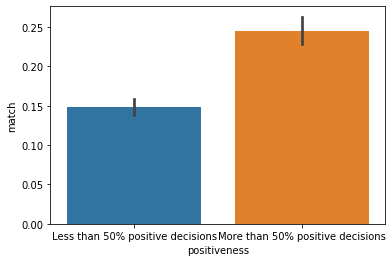

In [70]:
sns.barplot("positiveness", "match", data = dating)

In [71]:
# Let's take the more positive participants
dating_positive = dating[dating.positiveness == "More than 50% positive decisions"]

In [72]:
dating_with_numonly_positive = dating_with_only_numbers[dating_with_only_numbers.positiveness == "More than 50% positive decisions"]

In [73]:
dating_with_numonly_positive = dating_with_numonly_positive.drop("positiveness", axis = 1)

In [74]:
# Now we check the correlation again with the match outcome for all the variables
# We will drop obvious variables such as the partner's decision, and the person's decision
col_corr_with_match = [(col, abs(dating_with_numonly_positive["match"].corr(dating_with_numonly_positive[col]))) for col in dating_with_numonly_positive.columns]
col_corr_with_match.sort(key = sortSecond, reverse = True)
col_corr_with_match = col_corr_with_match[3:]
col_corr_with_match

[('attr_o', 0.39792666435858465),
 ('fun_o', 0.36043812172371276),
 ('dec', 0.3572837295555006),
 ('prob_o', 0.2857474604100171),
 ('like', 0.24493195039077315),
 ('prob', 0.23614666076260651),
 ('fun', 0.23277579570549486),
 ('sinc_o', 0.17957918561160147),
 ('attr', 0.17257029029920237),
 ('intel_o', 0.17153627622609127),
 ('sinc', 0.169054096056435),
 ('intel', 0.1678145753235882),
 ('shar1_1', 0.11671414785320536),
 ('go_out', 0.11251755878321179),
 ('fun3_1', 0.10955037885307152),
 ('attr3_1', 0.10750860601343296),
 ('condtn', 0.10323000355711268),
 ('fun1_1', 0.09497538553355707),
 ('met_o', 0.09166914914266476),
 ('shar2_1', 0.08926617620555931),
 ('clubbing', 0.08761218415494416),
 ('sinc1_1', 0.0875524325277813),
 ('date', 0.08162319718624576),
 ('intel2_1', 0.070652796080741),
 ('intel1_1', 0.06622109717498853),
 ('race', 0.0649045980552517),
 ('age', 0.06349059350761693),
 ('round', 0.061201407913648274),
 ('met', 0.05456749262620858),
 ('dec_perc', 0.054148576864919126),
 (

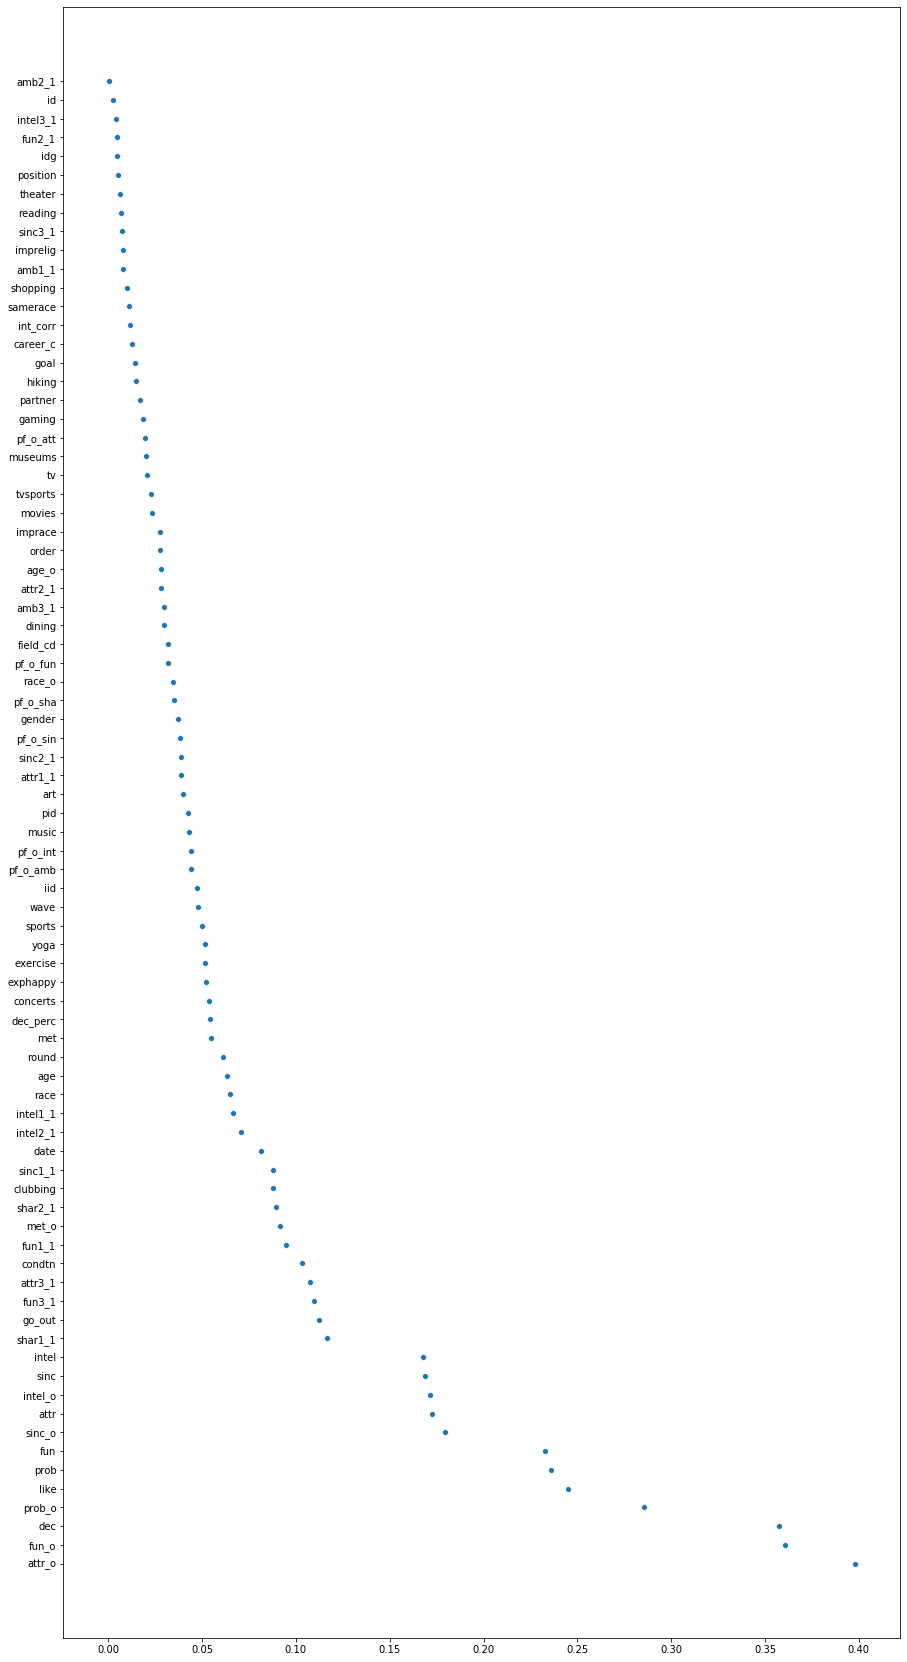

In [75]:
plt.figure(figsize = (15,30))
sns.scatterplot(list(dict(col_corr_with_match).values()), list(dict(col_corr_with_match).keys()))

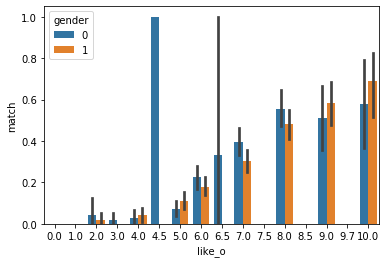

In [77]:
# Okay, let's see what are your chances if you are a positive decisioner depending on how well you have been liked by your partner
sns.barplot("like_o", "match", data = dating_positive, hue= "gender")

In [78]:
# Right, we can set our likeability threshold to 6,5
dating_positive["liked_by_partner"] = pd.cut(dating_positive["like_o"], bins = [0,6.5,10], labels=["Not liked", "Well liked"])

c:\users\omar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


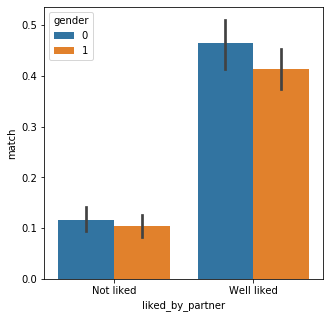

In [79]:
plt.figure(figsize=(5,5))
sns.barplot("liked_by_partner", "match", data = dating_positive, hue="gender")

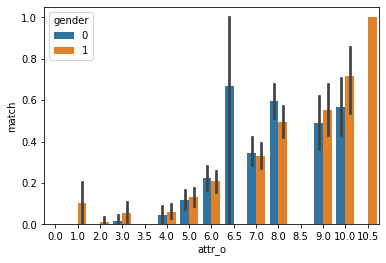

In [80]:
# That's good and all, but "being liked" doesn't tell us much about a person's individual traits
# Let's check them
sns.barplot("attr_o", "match", data = dating_positive, hue="gender")

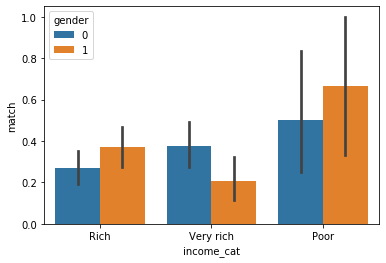

In [113]:
sns.barplot("income_cat", "match", data = dating_positive, hue="gender")

In [50]:
dating_positive["income_cat"] = dating_positive.income.apply(lambda x: "Very rich" if x > 50000
                                          else "Rich" if x > 25000
                                          else "Average" if x > 10000
                                          else "Small income")

c:\users\omar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
dating_positive.loc[:, ["income", "income_cat"]]

,income,income_cat
10,37405,Rich
11,28524,Rich
12,28524,Rich
13,28524,Rich
14,28524,Rich
15,28524,Rich
16,28524,Rich
17,28524,Rich
187,26706,Rich
188,26706,Rich


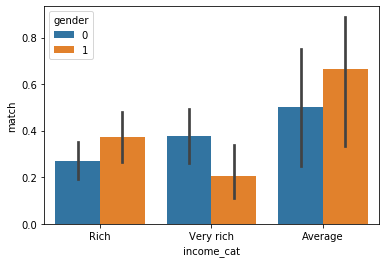

In [53]:
sns.barplot("income_cat", "match", hue= "gender", data = dating_positive)

In [186]:
dating["diff_age"] = abs(dating.age - dating.age_o)

c:\users\omar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [190]:
dating["diff_age_cat"] = pd.cut(dating.diff_age, bins=[2,4,6,8,10,12], labels=["very small", "small", "medium", "big", "very big"])

c:\users\omar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


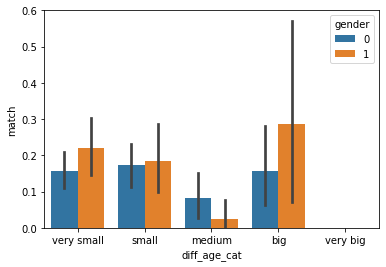

In [193]:
sns.barplot("diff_age_cat", "match", data = dating, hue = "gender")

In [198]:
big_agediff_lowinc = dating[(dating.diff_age >= 8) & (dating.income_cat == "Poor")]

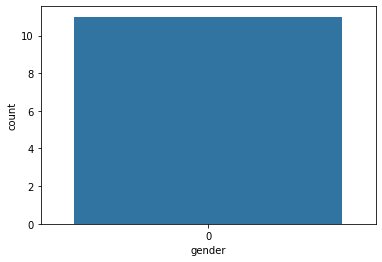

In [201]:
sns.countplot("gender", data = big_agediff_lowinc)

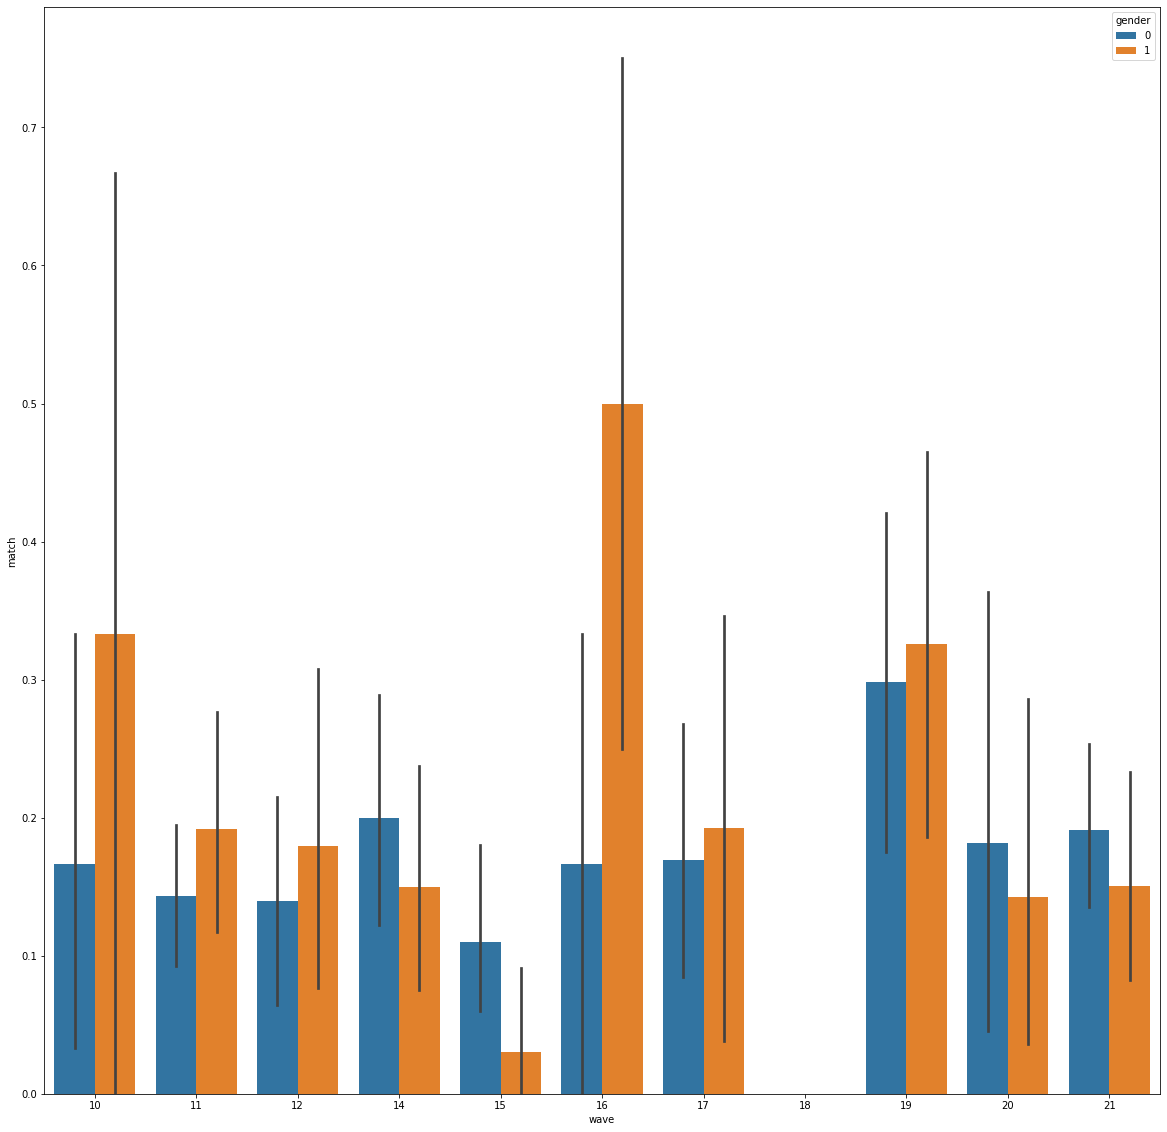

In [54]:
plt.figure(figsize = (20,20))
sns.barplot("wave", "match", data = dating, hue="gender")

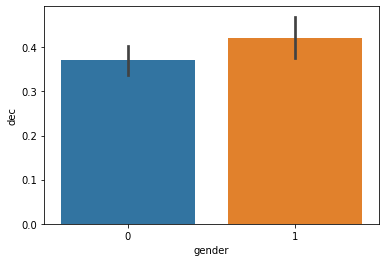

In [84]:
sns.barplot("gender", "dec", data = dating)

In [79]:
pd.crosstab([dating["wave"], dating["gender"], dating["race"]], dating["match"])

match              0   1
wave gender race        
10   0      2.0    6   2
            4.0   15   3
            6.0    4   0
     1      6.0    6   3
11   0      1.0   12   5
            2.0   97   7
            3.0    5   7
            4.0   45   7
            6.0    8   2
     1      1.0   15   3
            2.0   47  11
            4.0   14   4
12   0      2.0   62  11
            4.0   18   2
     1      2.0   22   7
            4.0   10   0
14   0      2.0   37  11
            3.0   10   4
            4.0   25   3
     1      2.0   55  10
            4.0   13   2
15   0      2.0   78   9
            4.0   11   2
     1      1.0   11   0
            2.0   21   1
16   0      2.0    6   2
            4.0    9   1
     1      2.0    4   5
            4.0    2   1
17   0      2.0   36  10
            4.0   12   0
            6.0   11   2
     1      2.0    8   3
            3.0    6   0
            6.0    7   2
18   0      2.0    4   0
            4.0    4   0
19   0      1.0    7   3
            2.0   15   6
            4.0    9   5
            6.0    9   3
     1      2.0   17   5
            4.0    2   1
            6.0   10   8
20   0      1.0    5   1
            2.0   10   3
            4.0    3   0
     1      2.0   10   2
            4.0   14   2
21   0      2.0   74  12
            4.0   20  19
            6.0   37   0
     1      1.0   14   2
            2.0   10   7
            4.0   38   2

In [81]:
corr = dating.drop(["iid", "id"], axis=1).corr()
for col in corr.columns:
    corr[col] = corr[col].apply(lambda x: abs(x) if abs(x) > 0.6 else 0)
#Same as dating.applymap

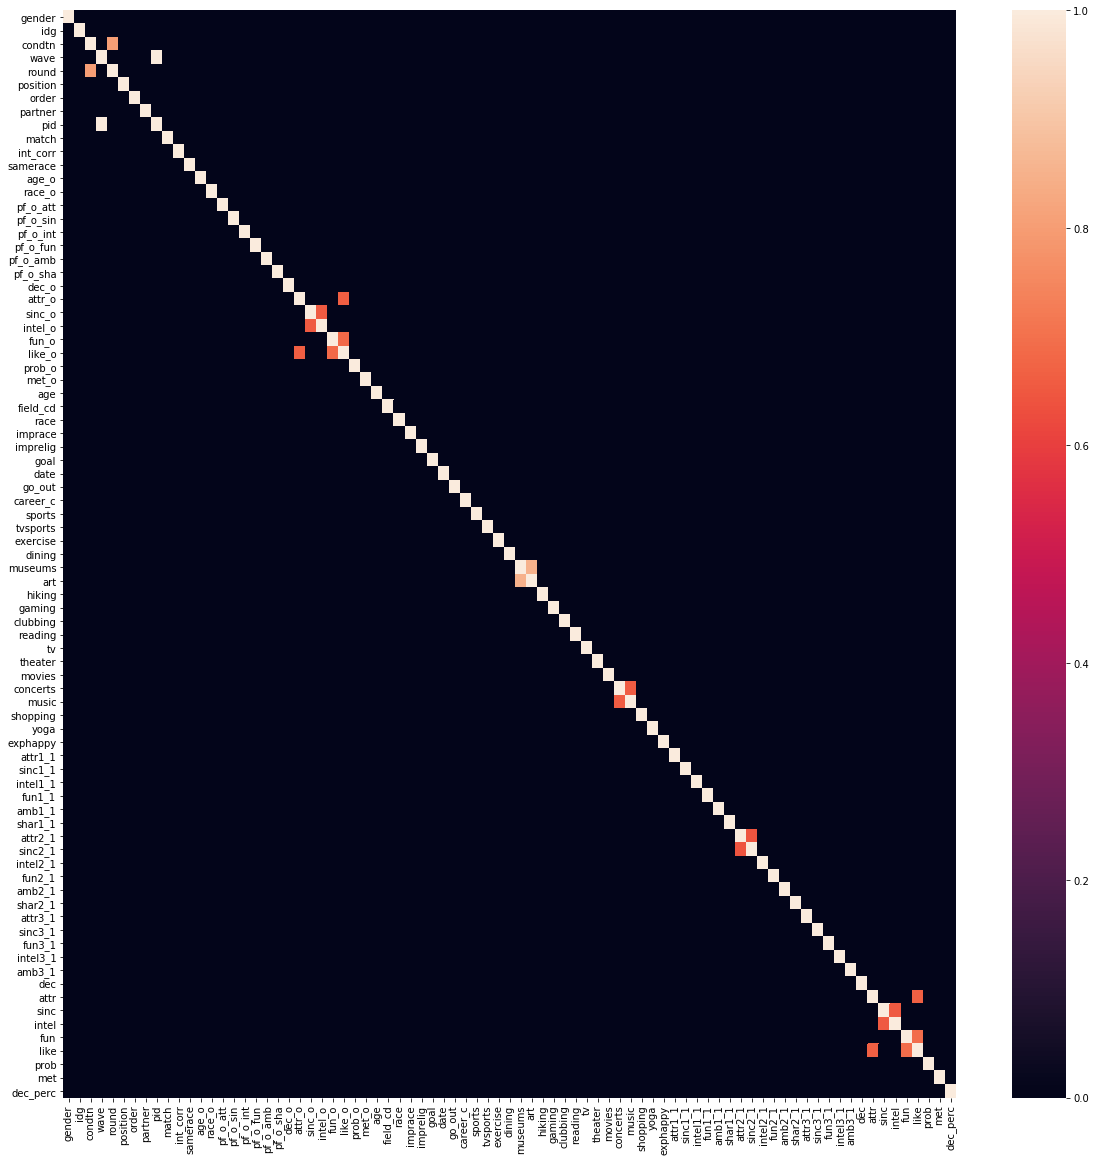

In [82]:
plt.figure(figsize = (20, 20))
sns.heatmap(corr)

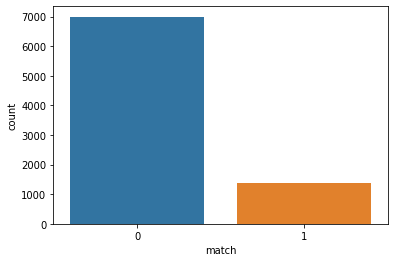

In [19]:
sns.countplot("match", data = clean_df)

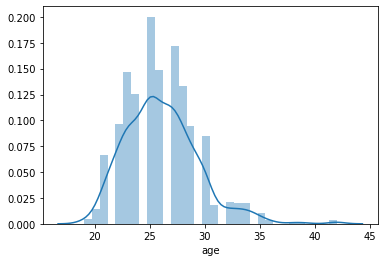

In [31]:
match_age_dist = matched.age.dropna()
unmatch_age_dist = unmatched.age.dropna()
age_dist = df.age.dropna()
sns.distplot(match_age_dist)

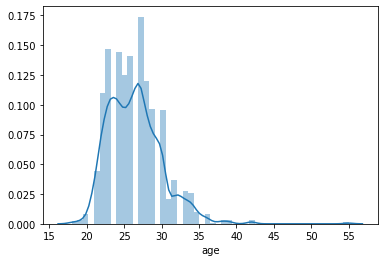

In [30]:
sns.distplot(unmatch_age_dist)

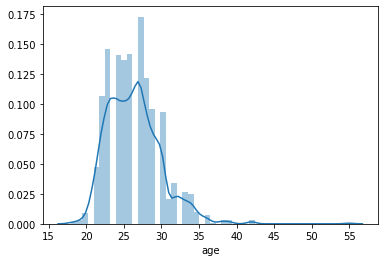

In [32]:
sns.distplot(age_dist)

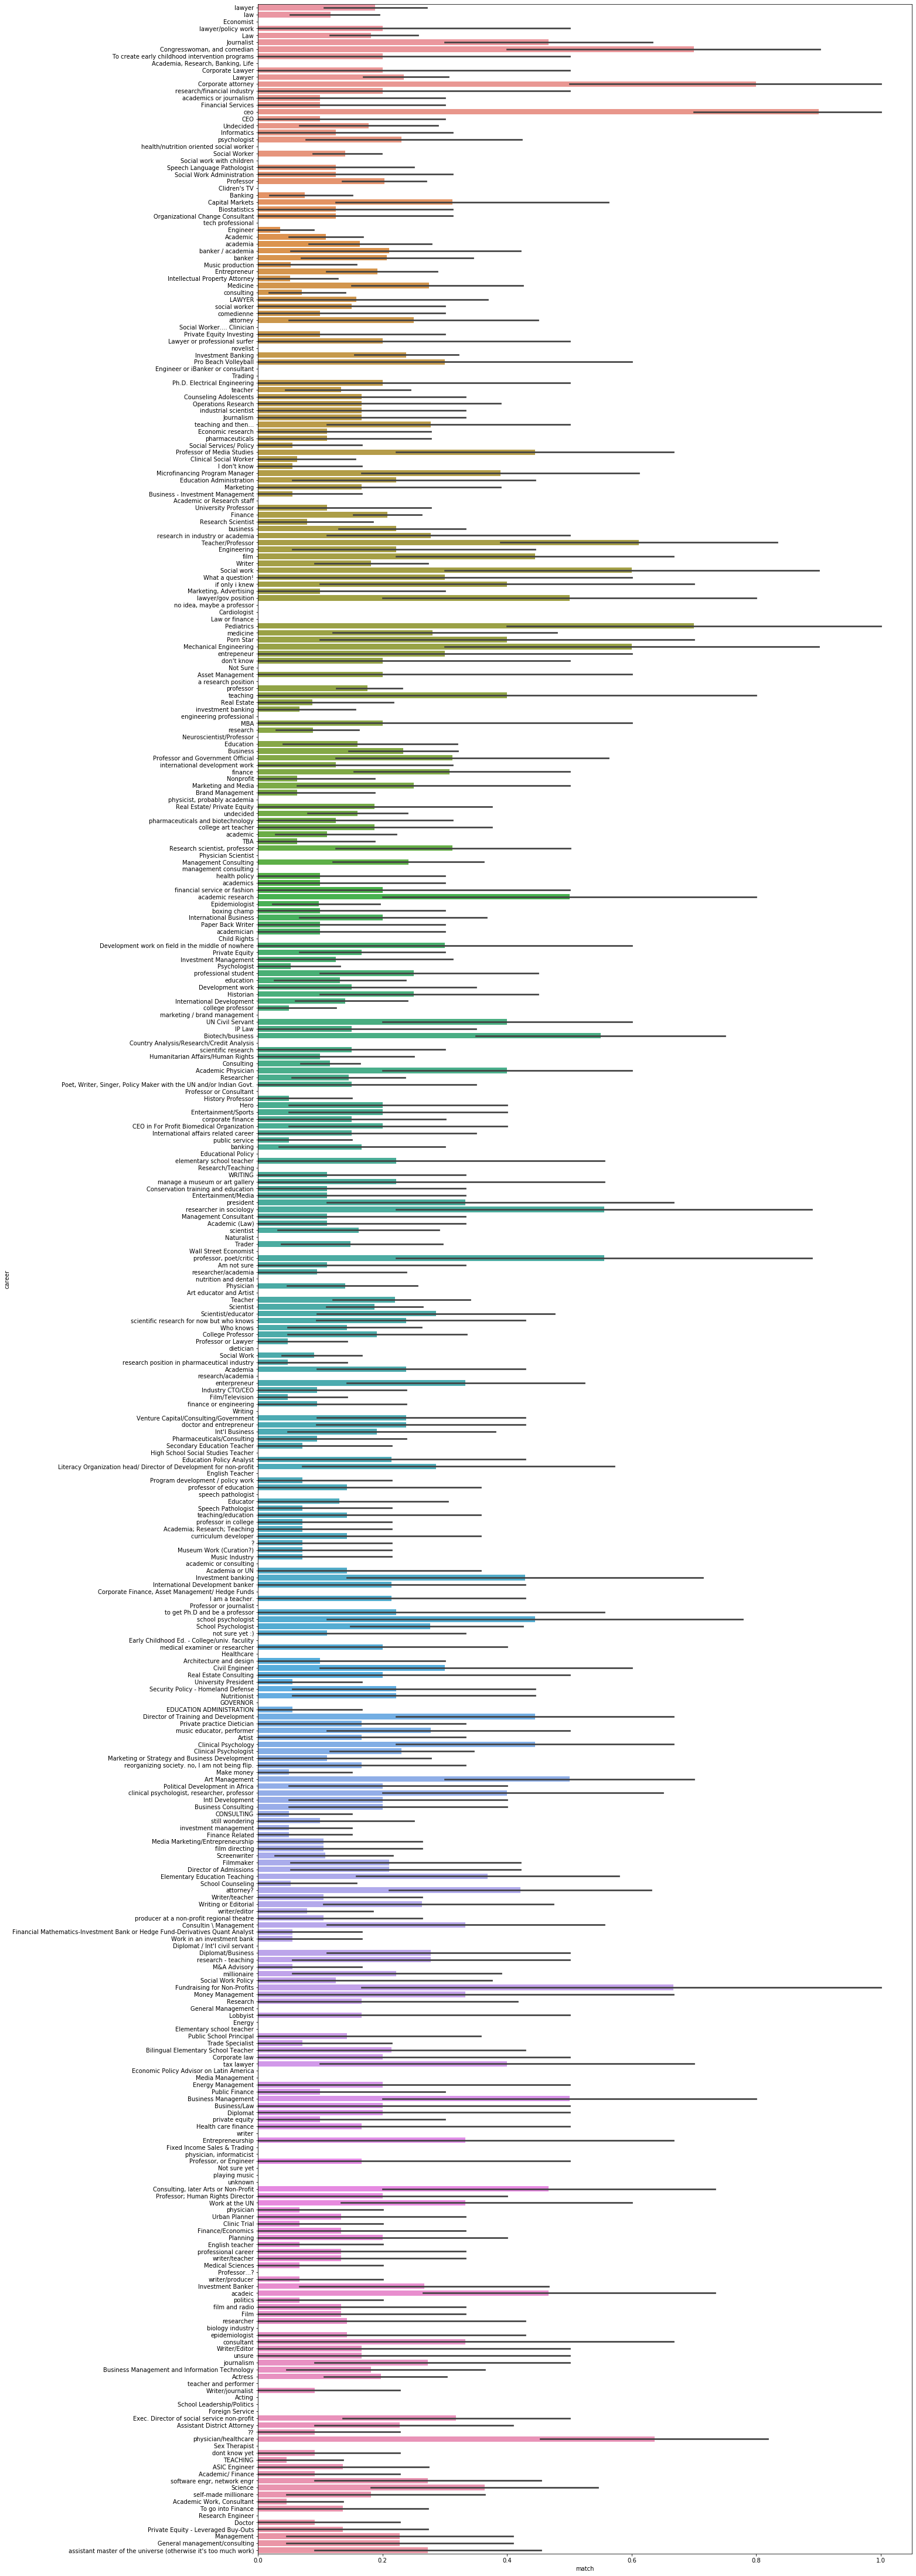

In [45]:
plt.figure(figsize=(20, 80))
sns.barplot("match", "career", data = df)

In [ ]:
# Let's try to check how you can increase your chances of matching given your race as an initial parameter